Data from Kaggle:

https://www.kaggle.com/antfarol/car-sale-advertisements

https://www.kaggle.com/satadru5/car-sale-prediction



https://www.udemy.com/course/the-data-science-course-complete-data-science-bootcamp/learn/lecture/14390482#overview
    
http://localhost:8888/tree/02-Topic/P01-Regression/S1-LinearRegression/S35_L226

## Importing the relevant libraries

In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [ ]:
def analyse_continuous(df,var,target,title):
    df = df.copy()
    # df[var] = df[var].fillna(df[var].median())
    plt.figure(figsize=(21,6))
       
    # histogram
    plt.subplot(141)
    sns.distplot(df[var], bins=30)
    #sns.distplot(df[var],hist=True, kde=True,kde_kws={'shade': True, 'linewidth': 3})
    plt.title('Histogram')    
    
    # Q-Q plot
    plt.subplot(142)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.ylabel('Quantiles')    
    
    # boxplot
    sns.boxplot(x=df[var])
    plt.title('Boxplot')
    plt.subplot(143)
    
    ## scatter plot
    plt.subplot(144)
    plt.scatter(df[var],df[target])
    plt.title('scatter plot')
    
    # skewness and kurtosis
    print('Skewness: %f' % df[var].skew())
    print('Kurtosis: %f' % df[var].kurt())
    plt.title(title)
    plt.show()

## Loading the raw data

In [2]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('CarSale.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


This is a list of second hand cars with the respective price types of body, mileage, engine volume, engine type, production model and information about the time when they were registered. What we would like to do is predict the pricee of a used car depending on its specifications. 

    + The first potential aggressor is brand as it is well-known that a BMW is generally more expensive than a Toyota. 
    + The second relevant variable is mileage since the more a car is driven the cheaper it should be. 
    + Third, the engine volume, sports cars have larger engines and economy cars have smaller engines
    + The final variable is year of production, the older the car, the cheaper it is with the exception of vintage vehicles
    + The rest are categorical variables which we'll deal with on a case by case basis

## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


1. **count**: First thing, we notice that each variable has a different number of observations which implies there are some missing values
2. **unique entries**: There are three hundred and twelve unique values in Model variable. That's something really hard to implement and a regression that would mean more than 300 dummies. So we drop this variable
3. **freq**: Another piece of information we obtain is the most common category. Frequency registration for instance is three thousand nine hunderd forty seven yes entries. Almost all of them looks like this variable won't be very useful. 
4. A lot of information for model could be engineered from band, year and engine volume so we wont' losing too much variability

### Determining the variables of interest

In [4]:
# For these several lessons, we will create the regression without 'Model'
# Certainly, when you work on the problem on your own, you could create a regression with 'Model'
data = raw_data.drop(['Model'],axis=1)

# Let's check the descriptives without 'Model'
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [5]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

brand, body, mileage, registration and years seem to have no missing values given that the total number of observations is four thousand three hundred and forty five. We can't say the same t hing about price and engine volume. 

A rule of thumb is that if you are removing less than 5 percent of observations, you are free to just remove all observations that have missing values. In this case they are less than that, so we are safe

In [6]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay
data_no_mv = data.dropna(axis=0)

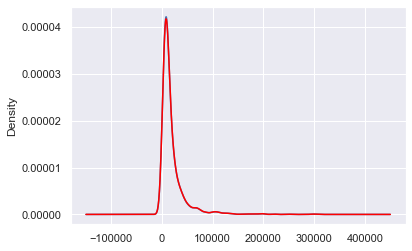

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
data['Price'].plot(kind='kde', ax=ax)

# variable imputed with the median
data_no_mv['Price'].plot(kind='kde', ax=ax, color='red')

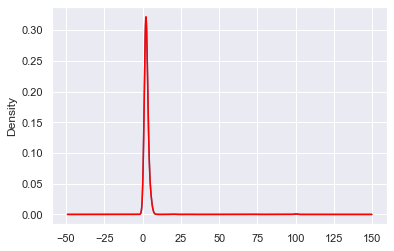

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
data['EngineV'].plot(kind='kde', ax=ax)

# variable imputed with the median
data_no_mv['EngineV'].plot(kind='kde', ax=ax, color='red')

In [7]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Notice the minimum and maximum values with respect to the mean and the core tiles for each variable. Moreover, I'll print the probability distribution functions for each feature as we discuss them

**Price**: has a mean around nineteen thousand dollars, the minimum price is six hundred dollars twenty five, twenty five percen of price are under seven thousand dollars, 50 percent below eleven thousand five hundred dollars and seventy five percent are lower than twenty one thousand nine hundred dollars. **Yet the maximum price is three hundred thousand dollars**. Something strange is going on. 

### Exploring the PDFs

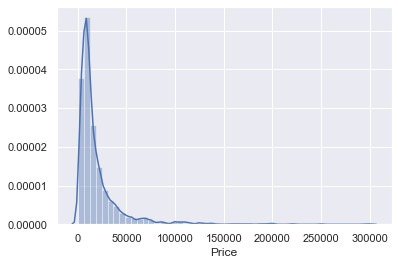

In [8]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_no_mv['Price'])

For optimal results, we would be looking for a normal distribution price however has an exponential one. This will surely be a problem for our regression. Obviously we have a few outliers in the price variable. Outliters are observations that lie on abnormal distance from other observations in the data, they will affect the regression dramatically in cost coefficients to  be inflated as the regression will try to place the line closer to those values. 

### Dealing with outliers

In [9]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


One way to deal with that seamlessly is to remove the top 1 percent of observations

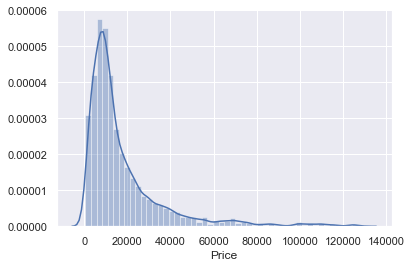

In [10]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data_1['Price'])

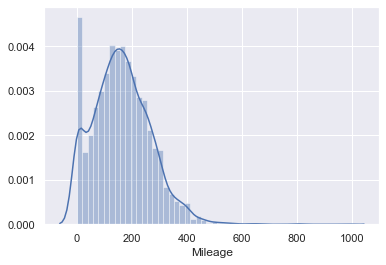

In [11]:
# We can treat the other numerical variables in a similar way
sns.distplot(data_no_mv['Mileage'])

The data is still distributed in the same way but with less outliers. We can deal with it in the same way keeping only the data lower than the ninety ninth percentile

In [12]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

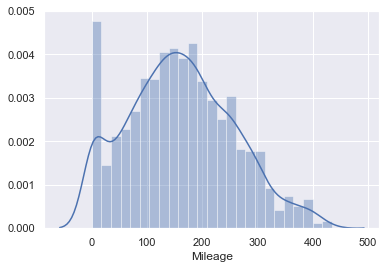

In [13]:
# This plot looks kind of normal, doesn't it?
sns.distplot(data_2['Mileage'])

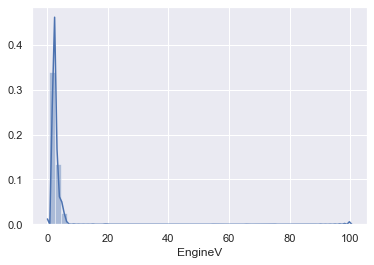

In [14]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.distplot(data_no_mv['EngineV'])

In [15]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_3 = data_2[data_2['EngineV']<6.5]

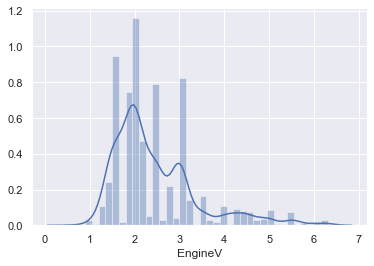

In [16]:
# Following this graph, we realize we can actually treat EngineV as a categorical variable
# Even so, in this course we won't, but that's yet something else you may try on your own
sns.distplot(data_3['EngineV'])

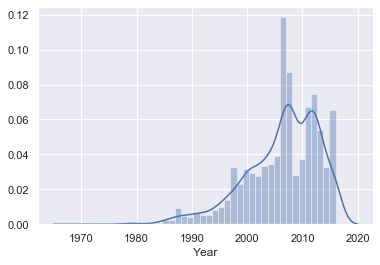

In [17]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.distplot(data_no_mv['Year'])

The problem with year is it's on the low end. Most cars are newer but there seem to be a few vintage cars this time. This time, I'll take the first percentile and the we'll keep all observations that are higher

In [18]:
# I'll simply remove them
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

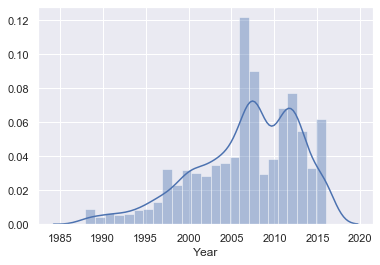

In [19]:
# Here's the new result
sns.distplot(data_4['Year'])

In [20]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [21]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Checking and fixing the assumptions in linear relationship

### 1. Checking linear relationship between independent and dependent variables

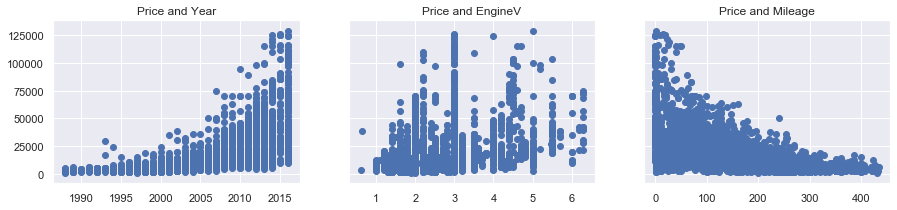

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

We can spot patterns but definitely not linear ones. We know we should not run a linear regression in this case. We should first transform one or more variables 

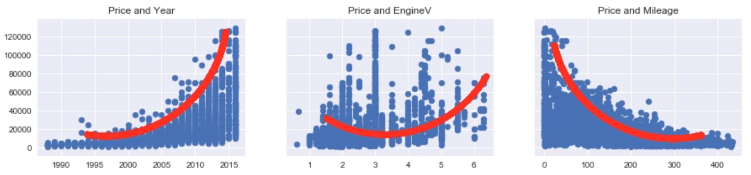

Recall the distribution plot of price to all these plot of price to all these plots are pointing us towards the idea that price is not normally distributed. And from there it's relationships with other rather normally distributed features is not linear. The patterns are quite exponential.

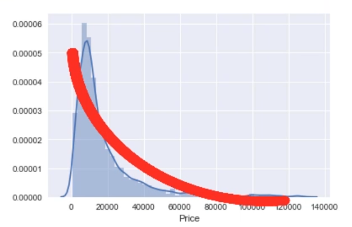

#### Log transformation

Log transformation is a common way to deal with this issue. It is especially useful when facing exponential relationships. 

In [23]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


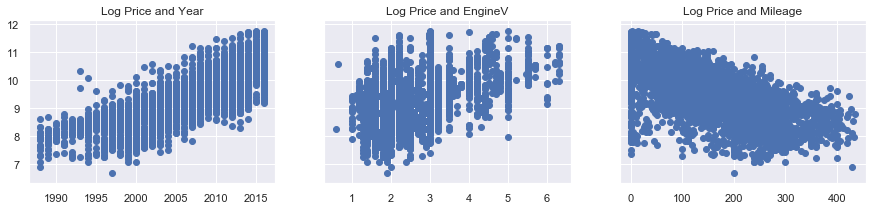

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

We can see a linear pattern in all plots now. The lines fit the data so much better

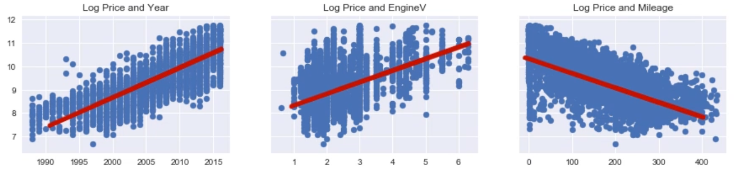

### 2. Normality and Homoscedasticity

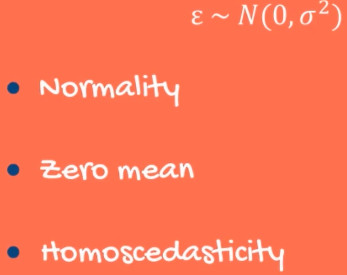

1. **Normality** is assumed for a big sample following the central limit theorem
2. **The zero mean** of the distribution of errors is accomplished to the inclusion of the intercept in the regression
3. **Homoscedascity** generally holds as we can see in the graphs. The reason for that is that we already implemented a log transformation which is the most common fix for homoscedascity

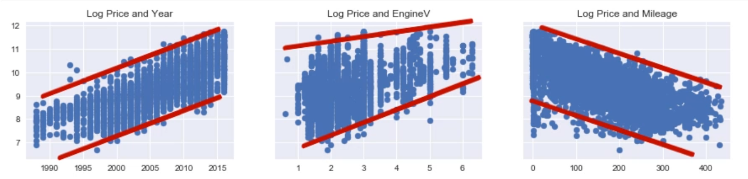

### 3. No autocorrelation

The observations we have are not coming from time series data or panel data they are simply a snapshot of the current situation at a second hand car sales website. Each row comes from a different customer who is willing to sell their car through the platform. Logically there is no reason for the observations to be dependent on each other. We are safe

### 4. Multicollinearity

It is logical that year and mileage are going to be correlated right. The newer the car the lower its mileage. Therefore we have grounds to expect some degree of multicore linearity in the data

In [25]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

The IAF produces a measure which estimates how much larger the square root of the standard error of an estimate is compared to a situation where the variable was completely uncorrelated with the other predictors

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


+ When VIF is 1, it means that there is no multiple linearity at all. This is also the minimum value of the measure
+ Generally, values between 1 and 5 are considered perfectly OK
+ Values above 5 is unacceptable

=> So it seems like a year is definitely too correlated with the other variables. Therefore I will only remove year

In [27]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

### 5. No Endogeneity

There are tests to check if it is violated or one can take the residuals and find theire correlation with each independent x. This can be checked after regression is created

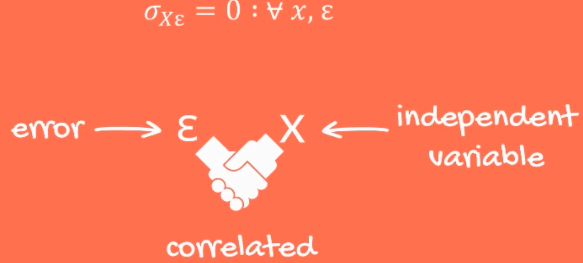

# Create dummy variables

If we have N categories for a feature, we have to create N-1 dummies. 

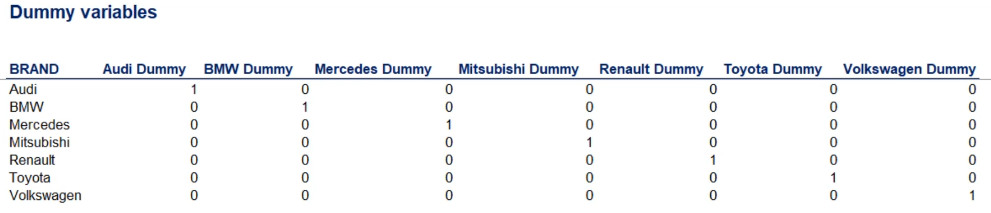

For the first brand we will not create a dummy variable. The reason is if all other dummy variables are zeros, it's clear that the car is an Audi. If we include a separate variable called Audi we will introduce multicolinearity to the regression as the Audi dummy would be perfectly determined by the other variables. Thus if we have n categories there will only be N minus one dummies 

### without removing the first dummy

In [28]:
data_with_first_dummies = pd.get_dummies(data_no_multicollinearity)

selected_cols = [col for col in data_with_first_dummies if col not in ['Price','log_price']]
variables = data_with_first_dummies[selected_cols]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

vif

C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,1.266554,Mileage
1,1.575735,EngineV
2,inf,Brand_Audi
3,inf,Brand_BMW
4,inf,Brand_Mercedes-Benz
5,inf,Brand_Mitsubishi
6,inf,Brand_Renault
7,inf,Brand_Toyota
8,inf,Brand_Volkswagen
9,inf,Body_crossover


### Removing the first dummy

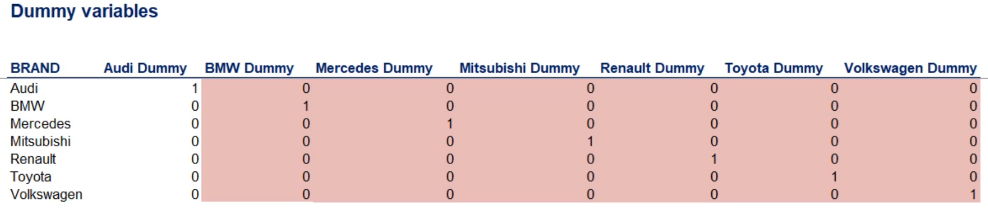

In [29]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [30]:
data_with_dummies.shape

(3867, 19)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

selected_cols = [col for col in data_with_dummies if col not in ['Price','log_price']]
variables = data_with_dummies[selected_cols]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

vif

,VIF,features
0,4.459662,Mileage
1,7.841729,EngineV
2,2.294007,Brand_BMW
3,2.868649,Brand_Mercedes-Benz
4,1.641712,Brand_Mitsubishi
5,2.086774,Brand_Renault
6,2.162166,Brand_Toyota
7,2.844515,Brand_Volkswagen
8,1.464260,Body_hatch
9,1.534059,Body_other


### Rearrange a bit

In [32]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [33]:
cols =  ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [34]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regression Model

### Declare the inputs and the targets

In [35]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Scale the data

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
inputs_scaled = scaler.transform(inputs)

Note: it is not usually recommended to standardize dummy variables. In fact, many practitioners would argue strongly agains it

### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [39]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_hat = reg.predict(x_train)

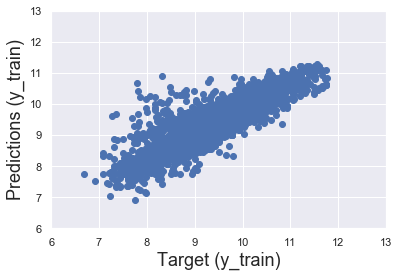

In [41]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target (y_train)', size = 18)
plt.ylabel('Predictions (y_train)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

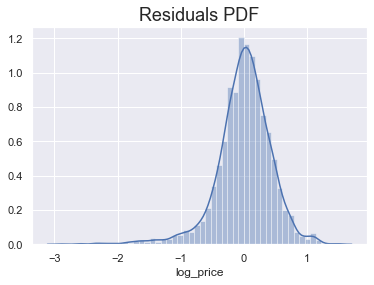

In [42]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size = 18)
plt.show()

In [43]:
reg.score(x_train, y_train)

0.744996578792662

### Finding the weights and bias

In [44]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


# Testing

In [45]:
y_hat_test = reg.predict(x_test)

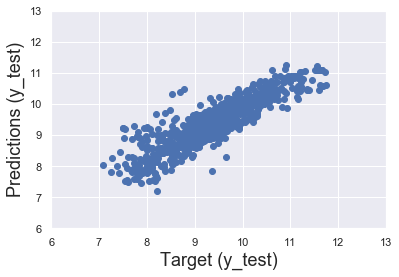

In [46]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Target (y_test)', size = 18)
plt.ylabel('Predictions (y_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

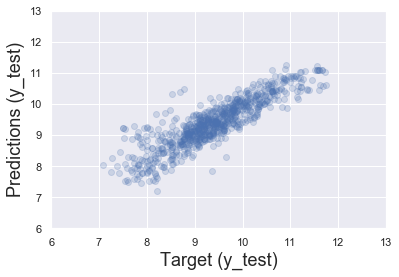

In [47]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Target (y_test)', size = 18)
plt.ylabel('Predictions (y_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [48]:
reg.score(x_test, y_test)

0.7726984972665856

In [49]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280


In [50]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [51]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN


In [52]:
y_test.head()

1192    7.740664
3360    7.937375
2350    7.824046
3257    8.764053
892     9.121509
Name: log_price, dtype: float64

In [53]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [54]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


In [55]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target'] * 100)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859


In [56]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [57]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


# Stats model

In [58]:
import statsmodels.api as sm

x = sm.add_constant(x_train)
results = sm.OLS(y_train, x).fit()

In [59]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     528.5
Date:                Thu, 21 May 2020   Prob (F-statistic):               0.00
Time:                        06:18:18   Log-Likelihood:                -1844.7
No. Observations:                3093   AIC:                             3725.
Df Residuals:                    3075   BIC:                             3834.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4152      0.008   1187.677      0.000       9.400       9.431
x1            -0.4487      0.009    -49.803      0.000      -0.466      -0.431
x2             0.2090      0.010     20.982      0.000       0.190       0.229
x3             0.0142      0.012      1.207      0.228      -0.009       0.037
x4             0.0129      0.013      1.023      0.306      -0.012       0.038
x5            -0.1406      0.011    -13.299      0.000      -0.161      -0.120
x6            -0.1799      0.012    -15.519      0.000      -0.203      -0.157
x7            -0.0605      0.012     -5.237      0.000      -0.083      -0.038
x8            -0.0899      0.013     -6.885      0.000      -0.116      -0.064
x9            -0.1455      0.010    -14.532      0.000      -0.165      -0.126
x10           -0.1014      0.010    -10.403      0.000      -0.121      -0.082
x11           -0.2006      0.012    -16.608      0.000      -0.224      -0.177
x12           -0.1299      0.010    -12.402      0.000      -0.150      -0.109
x13           -0.1686      0.012    -14.179      0.000      -0.192      -0.145
x14           -0.1215      0.009    -12.821      0.000      -0.140      -0.103
x15           -0.0334      0.008     -4.340      0.000      -0.048      -0.018
x16           -0.1469      0.010    -14.581      0.000      -0.167      -0.127
x17            0.3205      0.009     36.783      0.000       0.303       0.338
==============================================================================
Omnibus:                      683.222   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2701.464
Skew:                          -1.038   Prob(JB):                         0.00
Kurtosis:                       7.081   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
inputs.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [61]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Mileage','EngineV']
scaler = StandardScaler()
scaler.fit(inputs[num_cols])

inputs_scaled = scaler.transform(inputs[num_cols])
inputs_scaled = pd.DataFrame(inputs_scaled, columns = num_cols)
inputs_scaled.head()

,Mileage,EngineV
0,1.22,-0.47
1,2.79,0.47
2,2.07,2.69
3,0.83,1.84
4,-0.42,-0.47


In [62]:
cat_cols = ['Brand','Body','Engine Type','Registration']
data_with_dummies = pd.get_dummies(data_no_multicollinearity[cat_cols], drop_first=True)
sinputs_scaled_merged = pd.concat([inputs_scaled,data_with_dummies],axis=1)
sinputs_scaled_merged.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,1.22,-0.47,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,2.79,0.47,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2.07,2.69,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0.83,1.84,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,-0.42,-0.47,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sinputs_scaled_merged, targets, test_size=0.2, random_state=365)

In [64]:
import statsmodels.api as sm

x = sm.add_constant(x_train)
results = sm.OLS(y_train, x).fit()

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     528.5
Date:                Thu, 21 May 2020   Prob (F-statistic):               0.00
Time:                        06:19:06   Log-Likelihood:                -1844.7
No. Observations:                3093   AIC:                             3725.
Df Residuals:                    3075   BIC:                             3834.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.0908      0.040    227.380      0.000       9.012       9.169
Mileage                -0.4487      0.009    -49.803      0.000      -0.466      -0.431
EngineV                 0.2090      0.010     20.982      0.000       0.190       0.229
Brand_BMW               0.0387      0.032      1.207      0.228      -0.024       0.102
Brand_Mercedes-Benz     0.0325      0.032      1.023      0.306      -0.030       0.095
Brand_Mitsubishi       -0.5238      0.039    -13.299      0.000      -0.601      -0.447
Brand_Renault          -0.5711      0.037    -15.519      0.000      -0.643      -0.499
Brand_Toyota           -0.1808      0.035     -5.237      0.000      -0.248      -0.113
Brand_Volkswagen       -0.2173      0.032     -6.885      0.000      -0.279      -0.155
Body_hatch             -0.5883      0.040    -14.532      0.000      -0.668      -0.509
Body_other             -0.3449      0.033    -10.403      0.000      -0.410      -0.280
Body_sedan             -0.4135      0.025    -16.608      0.000      -0.462      -0.365
Body_vagon             -0.4405      0.036    -12.402      0.000      -0.510      -0.371
Body_van               -0.4625      0.033    -14.179      0.000      -0.527      -0.399
Engine Type_Gas        -0.3432      0.027    -12.821      0.000      -0.396      -0.291
Engine Type_Other      -0.2113      0.049     -4.340      0.000      -0.307      -0.116
Engine Type_Petrol     -0.3060      0.021    -14.581      0.000      -0.347      -0.265
Registration_yes        1.1002      0.030     36.783      0.000       1.042       1.159
==============================================================================
Omnibus:                      683.222   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2701.464
Skew:                          -1.038   Prob(JB):                         0.00
Kurtosis:                       7.081   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Next tasks

1. Perform linear regression without cleaning and preprocessing steps, compare the result
2. Create set of notebooks to perform different tasks: Visualization, Data Cleaning, Data Preprocessing, Feature Selection, Linear Regresssion, other models, Model Selection
3. Improve the model